# Apresentar os dados

Este conjunto de dados contém a lista de todos os jogos do metracritic, retirados em janeiro de 2025, e cada jogo desta lista possui cinco variaveis:

- Nome do jogo
- Plataforma do jogo
- Ano de lançamento (varia de 1995 até 2024)
- Userscore: média das notas dos usuários (varia de 0 a 10)
- Metascore: média das notas dos críticos (varia de 0 a 100)

Para esta análise vamos remover os jogos onde não tenha a nota médias dos usuários (pois o site exige uma quantidade mínima de avaliaçãoes para calcular está variável, caso contrário o site conta está variável como "tbd").

O objetivo desta análise é fazer uma análise descritiva dos dados e estudar a correlação entre as notas dos críticos e dos usuários.

In [1]:
#analise descritiva
import pandas as pd

data = pd.read_csv("MetacriticData.csv")

data_Copy = data.copy()
data_Copy = data_Copy[data_Copy['Lançamento'].isnull() == False]
data_Copy = data_Copy[data_Copy['Userscore'] != 'tbd']
data_Copy['Userscore'] = data_Copy['Userscore'].astype(float)
data_Copy['Lançamento'] = pd.to_datetime(data_Copy['Lançamento'])

# Análise descritiva 

Os 10 jogos mais bem avaliados segundo as críticas

In [2]:
data_Copy.head(10)

,nome,Metascore,Plataforma,Lançamento,Userscore
0,The Legend of Zelda: Ocarina of Time,99,Nintendo 64,1998-11-23,9.1
1,SoulCalibur,98,Dreamcast,1999-09-08,7.8
2,Grand Theft Auto IV,98,Xbox 360,2008-04-29,8.3
3,Super Mario Galaxy,97,Wii,2007-11-12,9.1
4,Super Mario Galaxy 2,97,Wii,2010-05-23,9.0
5,The Legend of Zelda: Breath of the Wild,97,Nintendo Switch,2017-03-03,8.9
6,Tony Hawk's Pro Skater 3,97,PlayStation 2,2001-10-30,7.7
7,Perfect Dark (2000),97,Nintendo 64,2000-05-22,8.5
8,Red Dead Redemption 2,97,PlayStation 4,2018-10-26,8.9
9,Grand Theft Auto V,97,PlayStation 4,2014-11-18,8.5


10 piores jogos

In [3]:
data_Copy.tail(10)

,nome,Metascore,Plataforma,Lançamento,Userscore
13396,Afro Samurai 2: Revenge of Kuma Volume One,21,PlayStation 4,2015-09-22,3.0
13397,Infestation: Survivor Stories (The War Z),20,PC,2012-10-15,1.7
13398,Deal or No Deal,20,DS,2007-07-23,3.5
13399,Alone in the Dark: Illumination,19,PC,2015-06-11,1.3
13400,Ride to Hell: Retribution,19,Xbox 360,2013-06-25,1.4
13401,SPOGS Racing,18,Wii,2008-07-07,6.1
13402,Double Dragon II: Wander of the Dragons,17,Xbox 360,2013-04-05,1.6
13403,Vroom in the Night Sky,17,Nintendo Switch,2017-04-05,3.2
13404,Yaris,17,Xbox 360,2007-10-10,5.0
13405,Family Party: 30 Great Games Obstacle Arcade,11,Wii U,2012-12-04,2.9


Visão geral dos dados 

In [4]:
#estatisticas descritivas
dataSummary = data_Copy[['Metascore','Userscore']]
dataSummary.describe().round(2)

,Metascore,Userscore
count,11841.00,11841.00
mean,71.38,6.93
std,12.18,1.36
min,11.00,0.30
25%,65.00,6.30
50%,73.00,7.20
75%,80.00,7.90
max,99.00,10.00


Correlação das notas dos críticos e dos usuários. 

In [5]:
dataSummary.corr().iloc[0,1].round(4)

0.5561

Correlação de 0.55 mostra uma correlação positiva mas não muito forte, ou seja, no geral os usuários mais concordam que discordam com críticas.

# Gráficos

Abaixo temos o gráfico das quantidades de jogos lançados por ano segundo o metacritic durante o ano de 1995 até 2024.

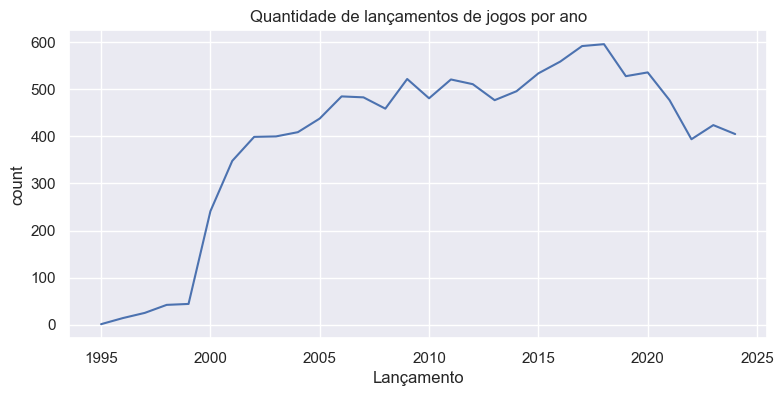

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(rc={'figure.figsize':(9,4)})

freqYear = data_Copy['Lançamento'].dt.year.value_counts()

sns.lineplot(freqYear)
plt.title("Quantidade de lançamentos de jogos por ano")
plt.show()

Segundo os dados do metacritic, há um salto muito grande de lançamentos a partir do ano 2000.

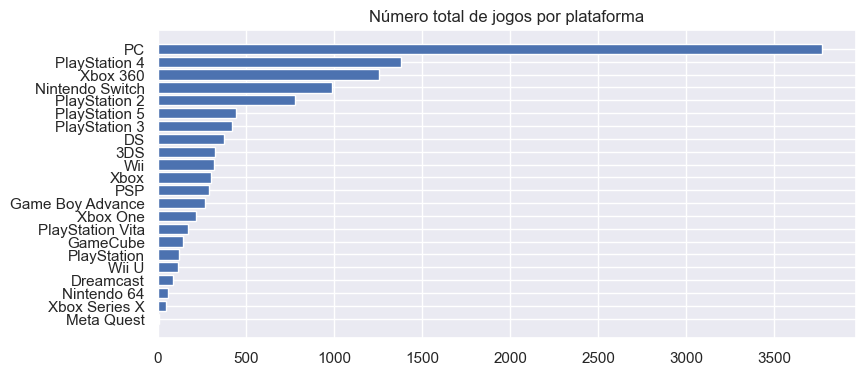

In [7]:
dataFreq = data_Copy['Plataforma'].value_counts().sort_values()

platformFreq = dataFreq.values
platformIndex = dataFreq.index

plt.barh(platformIndex, platformFreq)
plt.title("Número total de jogos por plataforma")
plt.show()

A plataforma com mais jogos e o computador, isso acontece por que ela é a plataforma que existe a mais tempo e tem jogos lançados a mais tempo.

O grafico abaixo mostra o total de lançamentos durante o ano de 1995 até 2024. Os meses preferidos para fazer lançamentos são outubro, novembro e setembro repectivamente.

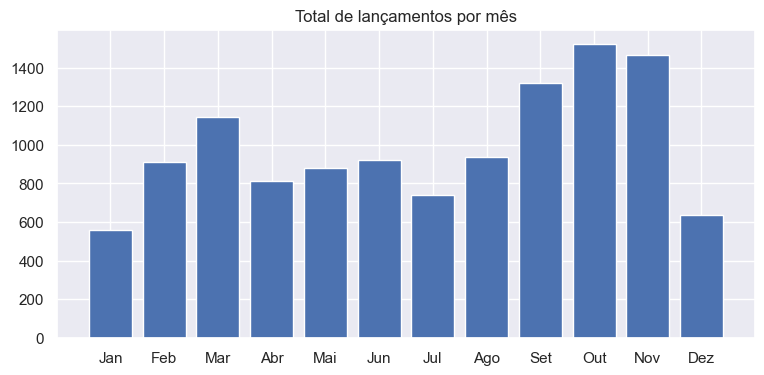

In [8]:
dateIndex = pd.to_datetime(data_Copy['Lançamento']).dt.month.value_counts().index
dateFreq = pd.to_datetime(data_Copy['Lançamento']).dt.month.value_counts()
mounths = ['Jan','Feb','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']

plt.bar(dateIndex,dateFreq)
plt.xticks(dateIndex.sort_values(),mounths)
plt.title("Total de lançamentos por mês")
plt.show()

Agora vamos ver o número de lançamentos de jogos por mês e por ano. Neste gráfico e possível vem uma tendência no crescimento de quantidades de lançamentos até entre 2016 á 2018 e depois disso há uma queda nos lançamentos. 

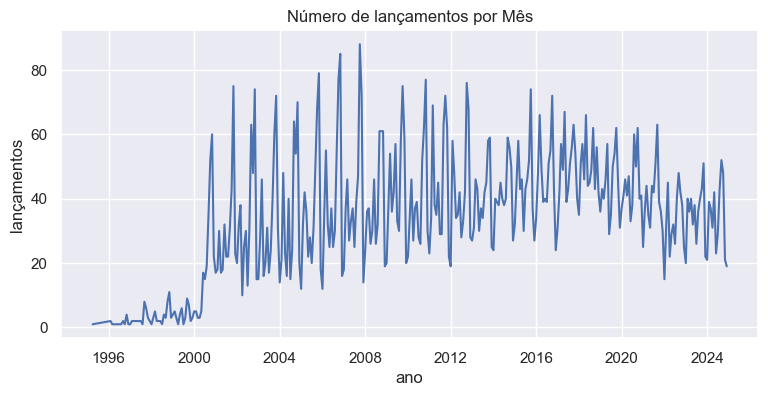

In [9]:
dates = data_Copy['Lançamento'].dt.strftime('%m/%Y')
dates = pd.to_datetime(dates,format='%m/%Y')
dateCount = dates.value_counts().sort_index()
dateIndex = dateCount.index
dateFreq = dateCount.values

plt.plot(dateIndex,dateFreq)
plt.xlabel('ano')
plt.ylabel('lançamentos')
plt.title("Número de lançamentos por Mês")
plt.show()

Gráfico de dispersão das notas dos usuários (Userscore) e das notas das críticas (Metascore).

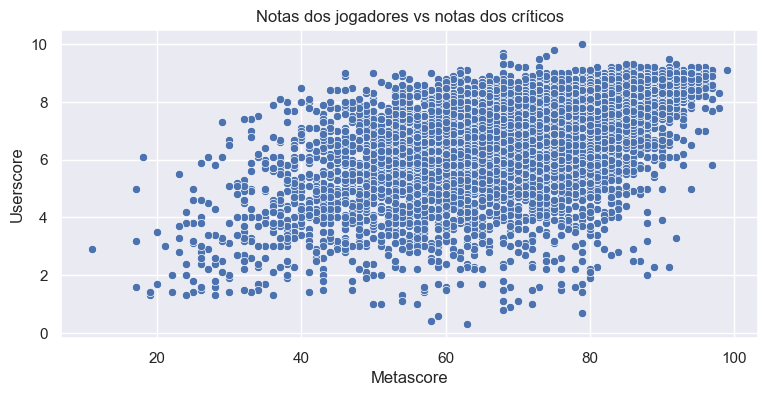

In [10]:
sns.scatterplot(x='Metascore',y='Userscore',data=data_Copy)
plt.title("Notas dos jogadores vs notas dos críticos")
plt.show()

Gráfico de dispersão das notas por ano. É possivel perceber uma tendência a partir de 2019 aparentemente as notas dos críticos foram aumentando e se concentrando entre 60 a 100 enquando as notas dos usuários mantém a mesma distribuição dos anos anteriores.

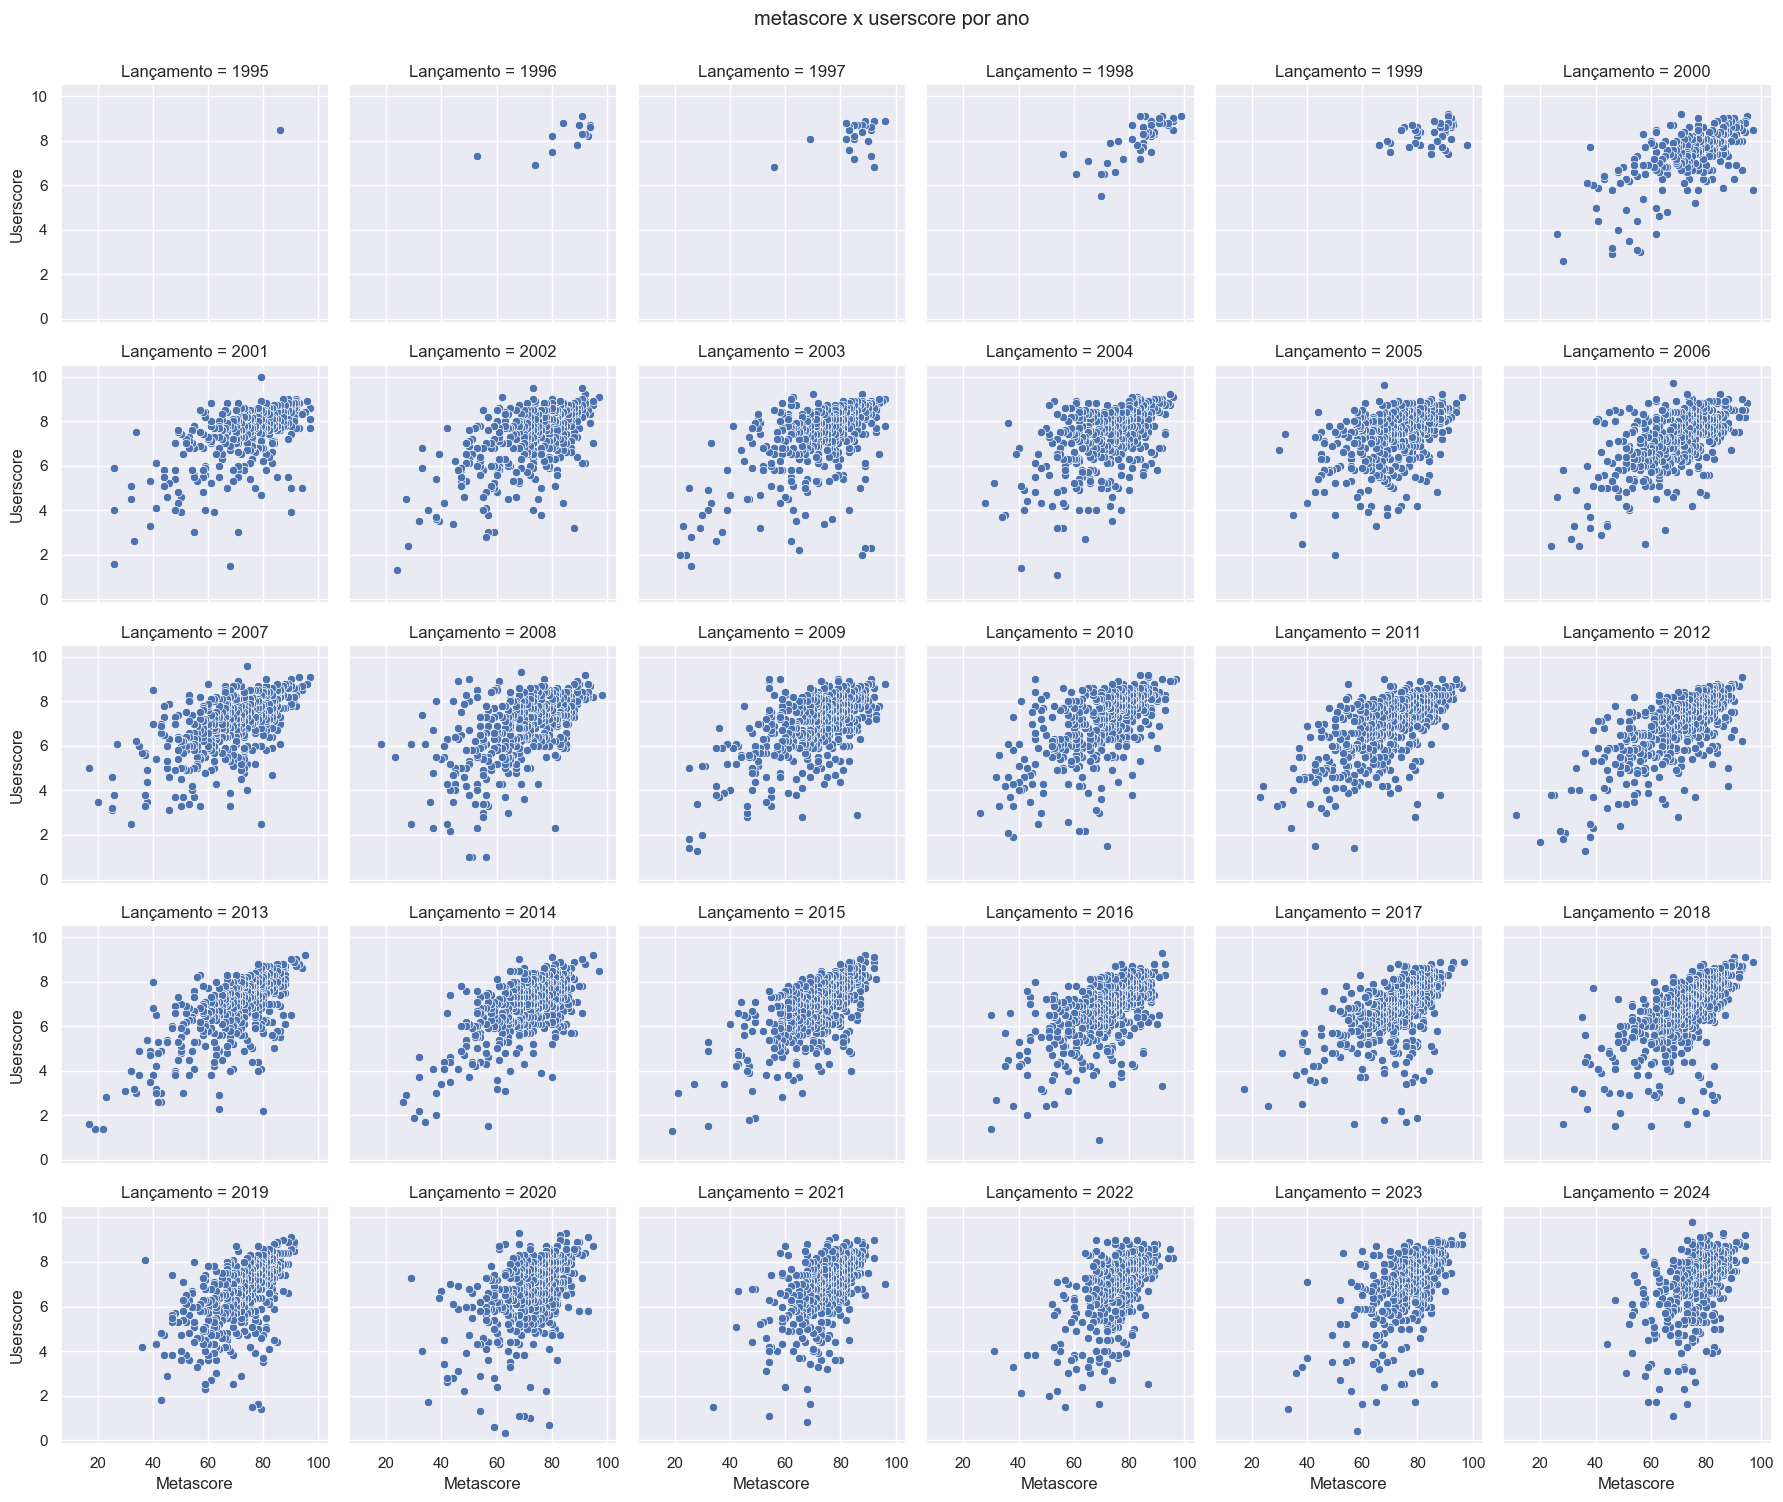

In [11]:
DataNumbers = data_Copy.loc[:,['Metascore','Userscore','Lançamento']]
DataNumbers['Lançamento'] = DataNumbers['Lançamento'].dt.year

g = sns.FacetGrid(DataNumbers,col='Lançamento',col_wrap=6)
g.map_dataframe(sns.scatterplot,x = 'Metascore',y = 'Userscore')
plt.suptitle('metascore x userscore por ano',y = 1)
g.tight_layout()
plt.show()

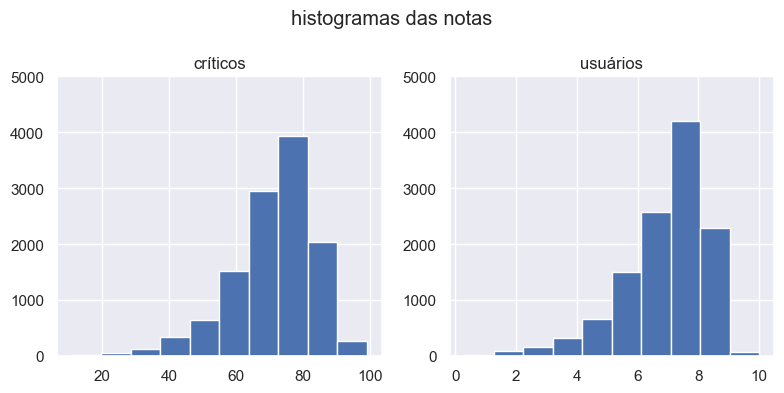

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].hist(data_Copy['Metascore'])
axes[0].set_title("críticos")
axes[0].set_ylim(0, 5000)

axes[1].hist(data_Copy['Userscore'])
axes[1].set_title("usuários")
axes[1].set_ylim(0, 5000)

fig.suptitle('histogramas das notas')

plt.tight_layout()
plt.show()

Histograma das notas dos críticos e usuários, ele mostra que as distribuições das notas são equivalentes e que a maioria das notas se concentram entre 6 a 10. (as notas dos críticos varia de 0 a 100 e dos usúario de 0 a 10 mas apesar da diferença de intervalos são equivalentes (uma nota 6 dos usuários corresponte a uma nota 60 dos críticos)).